##**머신러닝: 결정 트리 모델**

결정트리(Decision Tree)는 머신러닝 알고리즘 중 하나로, flowchart 같은 구조를 가진다. 기본적으로 결정트리는 데이터에 있는 규칙을 통해 데이터셋을 분류/예측하는 지도학습(supervised) 모델이다.

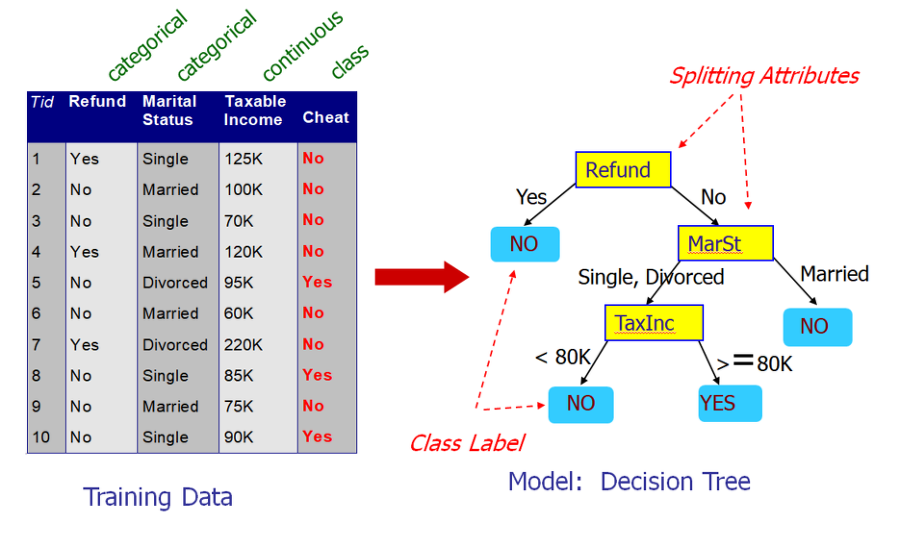

## **센서 데이터로 인간의 움직임 분류하기**

**UCI machine learning repository**</br>
**데이터셋:** https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Kaggle 데이터셋(CSV): https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

실험은 19-48세 사이의 30명의 지원자 그룹으로 수행되었습니다. 각자 스마트폰(Samsung Galaxy S II)을 허리에 착용하고 6가지 활동(WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING)을 수행했습니다. 내장된 가속도계와 자이로스코프를 사용하여 50Hz의 일정한 속도로 3축 선형 가속도와 3축 각속도를 캡처했습니다. 실험은 데이터에 수동으로 레이블을 지정하기 위해 비디오로 녹화되었습니다.

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataScience/DataFile/sensor.csv')

In [ ]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
df.shape

(7352, 563)

In [ ]:
df['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [ ]:
df['subject'].nunique()

21

In [ ]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

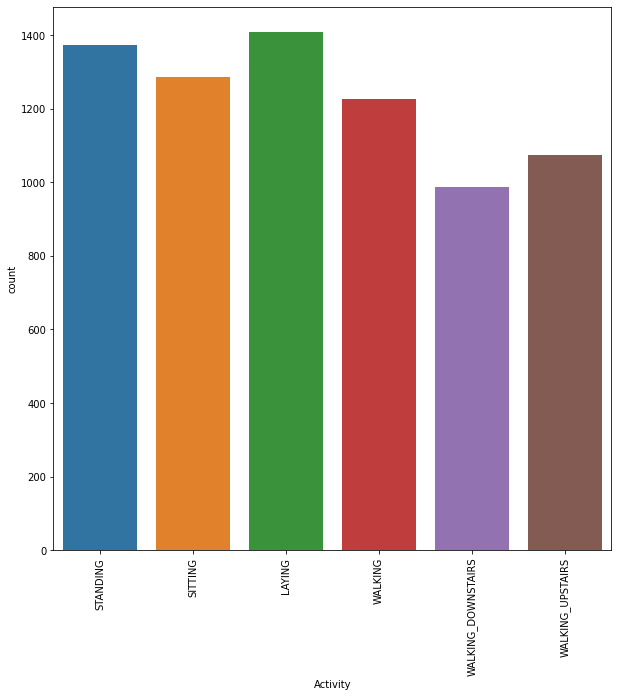

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Activity', data=df)
plt.xticks(x=df['Activity'], rotation=90)
plt.show()

In [ ]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
df.isna().values.sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

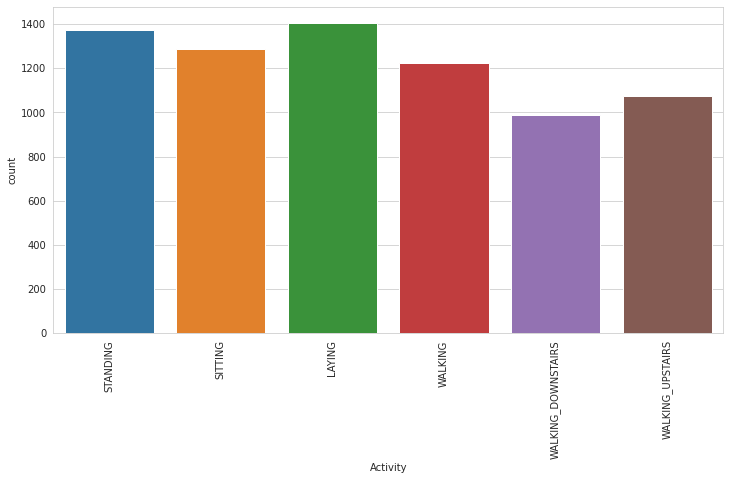

In [ ]:
plt.figure(figsize=(12,6))
# activity 가 범주형 데이터라서 countplot을 사용할 수 있음
axis=sns.countplot(x="Activity",data=df)
plt.xticks(x=df['Activity'],rotation='vertical')
plt.show()

In [ ]:
df.groupby('subject')['Activity'].nunique()

subject
1     6
3     6
5     6
6     6
7     6
8     6
11    6
14    6
15    6
16    6
17    6
19    6
21    6
22    6
23    6
25    6
26    6
27    6
28    6
29    6
30    6
Name: Activity, dtype: int64

In [ ]:
df.groupby('subject')['Activity'].value_counts()

subject  Activity          
1        WALKING               95
         STANDING              53
         WALKING_UPSTAIRS      53
         LAYING                50
         WALKING_DOWNSTAIRS    49
                               ..
30       WALKING               65
         WALKING_UPSTAIRS      65
         SITTING               62
         WALKING_DOWNSTAIRS    62
         STANDING              59
Name: Activity, Length: 126, dtype: int64

In [ ]:
pd.set_option('display.max_row', None)
pd.reset_option('default')
df.groupby('subject')['Activity'].value_counts()

subject  Activity          
1        WALKING               95
         STANDING              53
         WALKING_UPSTAIRS      53
         LAYING                50
         WALKING_DOWNSTAIRS    49
         SITTING               47
3        LAYING                62
         STANDING              61
         WALKING_UPSTAIRS      59
         WALKING               58
         SITTING               52
         WALKING_DOWNSTAIRS    49
5        STANDING              56
         WALKING               56
         LAYING                52
         WALKING_DOWNSTAIRS    47
         WALKING_UPSTAIRS      47
         SITTING               44
6        LAYING                57
         STANDING              57
         WALKING               57
         SITTING               55
         WALKING_UPSTAIRS      51
         WALKING_DOWNSTAIRS    48
7        WALKING               57
         STANDING              53
         LAYING                52
         WALKING_UPSTAIRS      51
         SITTING    

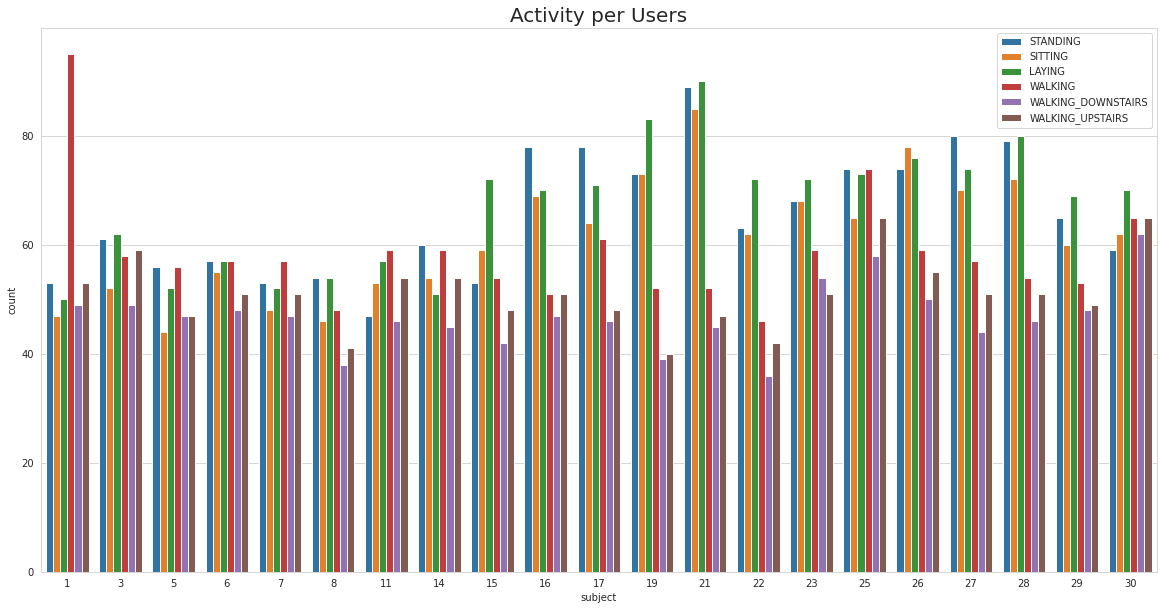

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title('Activity per Users', fontsize=20)
# hue = 'Activity' -> 이거를 통해 세개의 데이터를 볼 수 있음
sns.countplot(x='subject', hue='Activity', data=df)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# df.drop('subject', axis=1, inplace=True)

In [ ]:
X = df.drop('Activity', axis=1, inplace=False)

In [ ]:
Y = df['Activity'] 

In [ ]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
train_Y

In [ ]:
# max_depth : 하이퍼파라미터 - 성능을 좌우하는 변수
dtc = DecisionTreeClassifier(max_depth=6, random_state=150)
dtc.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=6, random_state=150)

In [ ]:
predict_Y = dtc.predict(test_X)

In [ ]:
confusion_matrix(test_Y, predict_Y)

array([[435,   0,   0,   0,   0,   0],
       [  0, 367,  39,   0,   0,   0],
       [  0,  40, 369,   0,   0,   0],
       [  0,   0,   0, 339,  10,  12],
       [  0,   0,   0,  13, 260,   7],
       [  0,   0,   0,  14,  13, 288]])

In [ ]:
accuracy_score(test_Y, predict_Y)

0.9329102447869447

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
Y_predict = rf.predict(test_X)
accuracy_score(test_Y, Y_predict)

0.9805077062556664

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(train_X, train_Y)
Y_predict = sv.predict(test_X)
accuracy_score(test_Y, Y_predict)

0.9673617407071623

In [ ]:
dtc.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=6, random_state=150)

In [ ]:
Y_predict = dtc.predict(test_X)

In [ ]:
confusion_matrix(test_Y, Y_predict)

array([[435,   0,   0,   0,   0,   0],
       [  0, 367,  39,   0,   0,   0],
       [  0,  41, 368,   0,   0,   0],
       [  0,   0,   0, 339,  10,  12],
       [  0,   0,   0,  13, 260,   7],
       [  0,   0,   0,  14,  13, 288]])

In [ ]:
accuracy_score(test_Y, Y_predict)

0.9324569356300997

## **분류 정확도 성능 향상: 결정트리의 하이퍼 매개변수 설정**

교차 검증(cross validation)은 train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 150,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV #cross validation 교차검증

In [ ]:
params = { 'max_depth': [n for n in range(5, 30)]}

In [ ]:
grid_cv = GridSearchCV(dtc, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score=True)

In [ ]:
# 여긴 보고 넘어가야할듯 컴파일하는ㄴ데 20분걸림
# 가장 정확한 depth 값은 10이다
grid_cv.fit(train_X, train_Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=150),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29]},
             return_train_score=True, scoring='accuracy')

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [ ]:
cv_results_df[['rank_test_score', 'param_max_depth', 'mean_test_score', 'mean_train_score']]

In [ ]:
grid_cv.best_score_, grid_cv.best_params_

## **시각화**

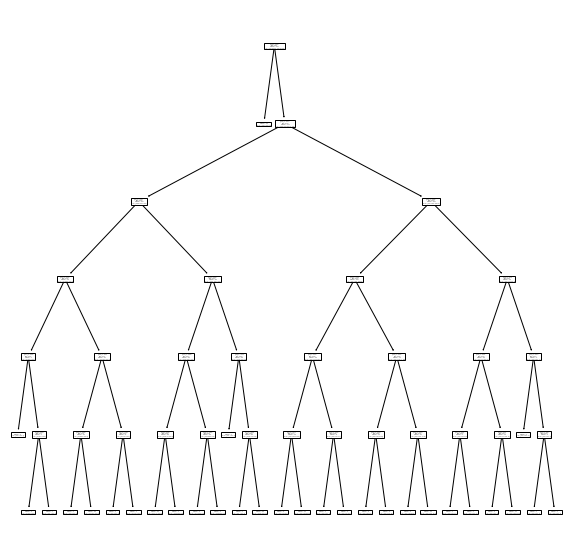

In [ ]:
from sklearn import tree

plt.figure(figsize=(10, 10))
tree.plot_tree(dtc)
plt.show()

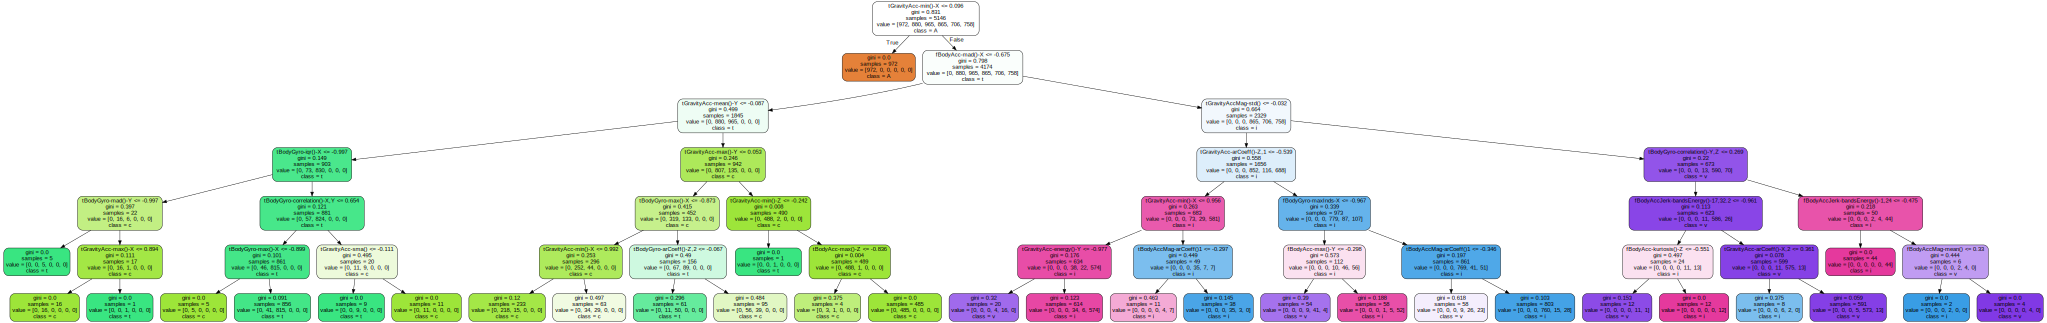

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, filled=True, rounded = True, feature_names=df.columns[:-1],  class_names=df.columns[-1]) #feature_names=df.columns[:-1],  class_names=df.columns[-1]
graph = graphviz.Source(dot_data)
graph.render('test')
graph